# Table of Contents.

* Introduction
* Data Wrangling
    1. Discovering
    2. Structuring
    3. Cleaning
    4. Enriching
    5. Validating
    6. Publishing
* Probability
* A/B Test
    1. Hypothesis test
    2. Regression
* Conclusions
    1. Results
    2. Limitations

# Introduction

* **CustomerID:** A unique ID that identifies each customer.
* **Gender:** The customer’s gender: Male, Female
* **Senior Citizen:** Indicates if the customer is 65 or older: Yes, No
* **Married:** Indicates if the customer is married: Yes, No
* **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* **Tenure in Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
* **Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No
* **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* **Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
* **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
* **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
* **Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
* **Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
* **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* **Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
* **Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No
* **Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* **Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.
* **Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.
* **Churn:** Yes = the customer left the company this quarter. No = the customer remained with the company.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plot_assist import * 
import statsmodels.api as sm
import random
import re
random.seed(42)

# Data Wrangling

## 1. Discovering

In [2]:
df = pd.read_csv('resources/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(f'No. rows: {df.shape[0]} \nNo. columns: {df.shape[1]}')

No. rows: 7043 
No. columns: 21


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
descrip_column(df['customerID'])

name: customerID
dtype: object
null count: 0
unique: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
unique count: 7043
max frequncy: 1
min frequncy: 1


* the IDs is not repetative which means there is new ID for each row.
* we are going to drop this column since we will not use it.

In [6]:
descrip_column(df['gender'])

name: gender
dtype: object
null count: 0
unique: ['Female' 'Male']
unique count: 2
max frequncy: 3555
min frequncy: 3488


* this variable type is categorical nominal with values either `Female` or `Male`.
* this column has no missing values.

In [7]:
descrip_column(df['SeniorCitizen'])

name: SeniorCitizen
dtype: int64
null count: 0
unique: [0 1]
unique count: 2
max range: 1
min range: 0
max frequncy: 5901
min frequncy: 1142


* this variable type is categorical nominal with values either `0` or `1`.
* this column has no missing values.

In [8]:
descrip_column(df['Partner'])

name: Partner
dtype: object
null count: 0
unique: ['Yes' 'No']
unique count: 2
max frequncy: 3641
min frequncy: 3402


* this variable type is categorical nominal with values either `Yes` or `No`.
* this column has no missing values.

In [9]:
descrip_column(df['Dependents'])

name: Dependents
dtype: object
null count: 0
unique: ['No' 'Yes']
unique count: 2
max frequncy: 4933
min frequncy: 2110


* this variable type is categorical nominal with values either `Yes` or `No`.
* this column has no missing values.

In [10]:
descrip_column(df['tenure'])

name: tenure
dtype: int64
null count: 0
unique: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
unique count: 73
max range: 72
min range: 0
max frequncy: 613
min frequncy: 11


* this variable type is quantitative discrete with range from `0` to `72`.
* this column has no missing values.

In [11]:
descrip_column(df['PhoneService'])

name: PhoneService
dtype: object
null count: 0
unique: ['No' 'Yes']
unique count: 2
max frequncy: 6361
min frequncy: 682


* this variable type is categorical nominal with values either `Yes` or `No`.
* this column has no missing values.

In [12]:
descrip_column(df['MultipleLines'])

name: MultipleLines
dtype: object
null count: 0
unique: ['No phone service' 'No' 'Yes']
unique count: 3
max frequncy: 3390
min frequncy: 682


* this variable type is categorical nominal with values either `Yes`, `No` or `No phone service`.
* this column has no missing values.

In [13]:
descrip_column(df['InternetService'])

name: InternetService
dtype: object
null count: 0
unique: ['DSL' 'Fiber optic' 'No']
unique count: 3
max frequncy: 3096
min frequncy: 1526


* this variable type is categorical nominal with values either `DSL`, `Fiber optic` or `No`.
* this column has no missing values.

In [14]:
descrip_column(df['OnlineSecurity'])

name: OnlineSecurity
dtype: object
null count: 0
unique: ['No' 'Yes' 'No internet service']
unique count: 3
max frequncy: 3498
min frequncy: 1526


* this variable type is categorical nominal with values either `No`, `Yes` or `No internet service`.
* this column has no missing values.

In [15]:
descrip_column(df['OnlineBackup'])

name: OnlineBackup
dtype: object
null count: 0
unique: ['Yes' 'No' 'No internet service']
unique count: 3
max frequncy: 3088
min frequncy: 1526


* this variable type is categorical nominal with values either `No`, `Yes` or `No internet service`.
* this column has no missing values.

In [16]:
descrip_column(df['DeviceProtection'])

name: DeviceProtection
dtype: object
null count: 0
unique: ['No' 'Yes' 'No internet service']
unique count: 3
max frequncy: 3095
min frequncy: 1526


* this variable type is categorical nominal with values either `No`, `Yes` or `No internet service`.
* this column has no missing values.

In [17]:
descrip_column(df['TechSupport'])

name: TechSupport
dtype: object
null count: 0
unique: ['No' 'Yes' 'No internet service']
unique count: 3
max frequncy: 3473
min frequncy: 1526


* this variable type is categorical nominal with values either `No`, `Yes` or `No internet service`.
* this column has no missing values.

In [18]:
descrip_column(df['StreamingTV'])

name: StreamingTV
dtype: object
null count: 0
unique: ['No' 'Yes' 'No internet service']
unique count: 3
max frequncy: 2810
min frequncy: 1526


* this variable type is categorical nominal with values either `No`, `Yes` or `No internet service`.
* this column has no missing values.

In [19]:
descrip_column(df['StreamingMovies'])

name: StreamingMovies
dtype: object
null count: 0
unique: ['No' 'Yes' 'No internet service']
unique count: 3
max frequncy: 2785
min frequncy: 1526


* this variable type is categorical nominal with values either `No`, `Yes` or `No internet service`.
* this column has no missing values.

In [20]:
descrip_column(df['Contract'])

name: Contract
dtype: object
null count: 0
unique: ['Month-to-month' 'One year' 'Two year']
unique count: 3
max frequncy: 3875
min frequncy: 1473


* this variable type is categorical nominal with values either `Month-to-month`, `One year` or `Two year`.
* this column has no missing values.

In [21]:
descrip_column(df['PaperlessBilling'])

name: PaperlessBilling
dtype: object
null count: 0
unique: ['Yes' 'No']
unique count: 2
max frequncy: 4171
min frequncy: 2872


* this variable type is categorical nominal with values either `Yes` or `No`.
* this column has no missing values.

In [22]:
descrip_column(df['PaymentMethod'])

name: PaymentMethod
dtype: object
null count: 0
unique: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
unique count: 4
max frequncy: 2365
min frequncy: 1522


* this variable type is categorical nominal with values either `Electronic check`, `Mailed check`, `Bank transfer (automatic)` or `Credit card (automatic)`.
* this column has no missing values.

In [23]:
descrip_column(df['MonthlyCharges'])

name: MonthlyCharges
dtype: float64
null count: 0
unique: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
unique count: 1585
max range: 118.75
min range: 18.25
max frequncy: 61
min frequncy: 1


* this variable type is quantitative continuous with range from `18.25` to `118.75`
* this column has no missing values.

In [24]:
descrip_column(df['TotalCharges'])

name: TotalCharges
dtype: object
null count: 0
unique: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
unique count: 6531
max frequncy: 11
min frequncy: 1


* this variable type is quantitative continuous.
* the column datatype `object` is not suitable for quantitative variable it should be converted to `float`
* this column has no missing values.

In [25]:
descrip_column(df['Churn'])

name: Churn
dtype: object
null count: 0
unique: ['No' 'Yes']
unique count: 2
max frequncy: 5174
min frequncy: 1869


* this variable type is categorical nominal with values either `Yes` or `No`.
* this column has no missing values.

## 2. Structuring

will skip this step as the dataset is already in a suitable structure

## 3. Cleaning

In [26]:
df.drop(columns='customerID',inplace=True)

In [27]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [28]:
df[df['TotalCharges'].isnull()].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [29]:
df.loc[df['TotalCharges'].isnull(),'TotalCharges'] = df['TotalCharges'].mean()

In [30]:
df['TotalCharges'].isnull().any()

False

## 4. Enriching

we will skip this step as there is no additional data to be added

## 5. Validating

we will skip this step as no need for validation

## 6. Publishing

before saving our data we change columns names to lower case separating words by underscore for the ease of use later.

In [31]:
df.rename(columns=lambda x: re.sub(r"(\w)([A-Z])", r"\1_\2",x).lower(), inplace=True)
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

now that everything is set we are ready to save our data.

In [32]:
df.to_csv('resources/telco_customer_churn_clean.csv', index=False)

# Probability

## what is the churn rate in the dataset?

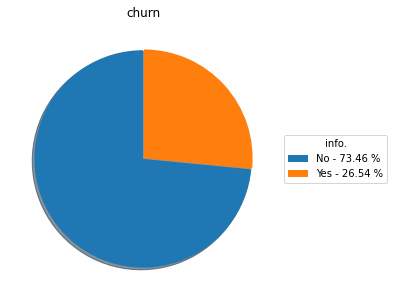

In [33]:
pie_plot(df['churn'])

## what is the probability of Males/Females that canceled their subscriptions?

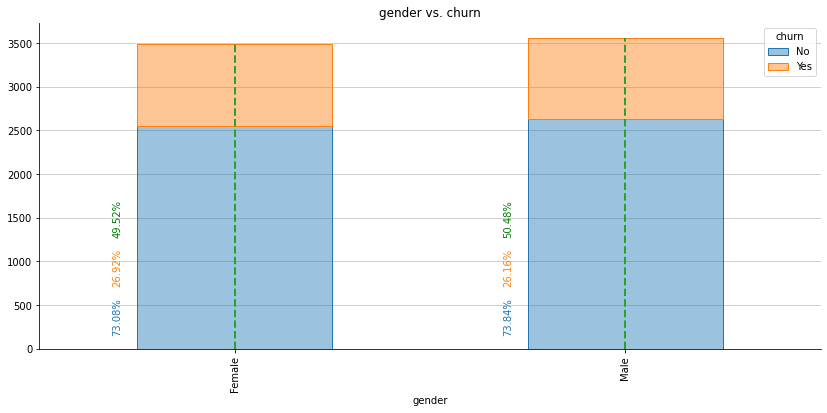

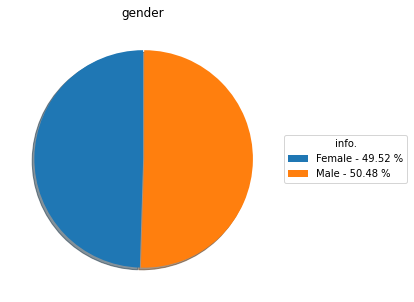

In [34]:
bar_plot(df,'gender','churn')
pie_plot(df['gender'])

* the probability of customer who did not cancel their subscriptions given that they are females is 26.92%
* the probability of customer who canceled their subscriptions given that they are females is 73.08%
* the probability of customer who did not cancel their subscriptions given that they are males is 26.16%
* the probability of customer who canceled their subscriptions given that they are males is 73.84%

* $\text{P(female)} = 49.52\% $
* $\text{P(male)} = 50.48\% $
* $\text{P(churn | female)} = 26.92\% $
* $\text{P(¬churn | female)} = 73.08\% $
* $\text{P(churn | male)} = 26.16\% $
* $\text{P(¬churn | male)} = 73.84\% $

## what is the probability of Senior Citizen customers that canceled their subscriptions?

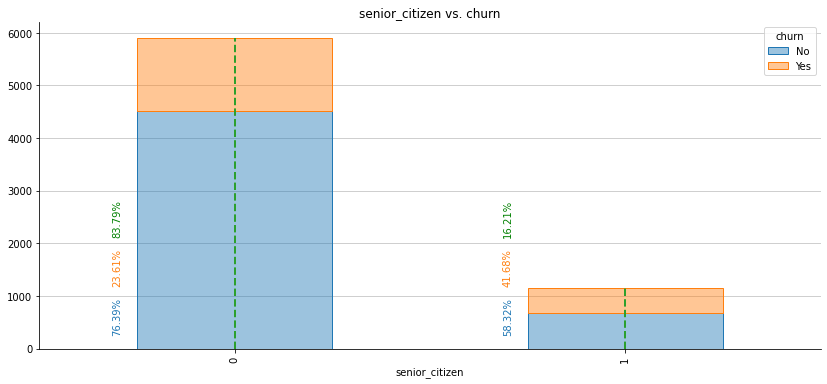

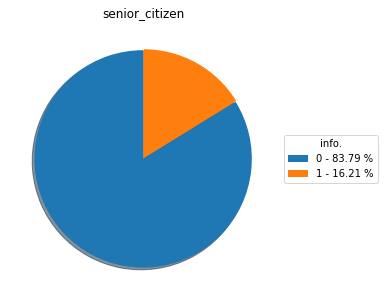

In [35]:
bar_plot(df,'senior_citizen','churn')
pie_plot(df['senior_citizen'])

* $\text{P(¬SeniorCitizen)} = 83.79\% $
* $\text{P(SeniorCitizen)} = 16.21\% $
* $\text{P(Churn | SeniorCitizen)} = 26.92\% $
* $\text{P(¬Churn | SeniorCitizen)} = 73.08\% $
* $\text{P(Churn | ¬SeniorCitizen)} = 26.16\% $
* $\text{P(¬Churn | ¬SeniorCitizen)} = 73.84\% $

## what is the probability of Partner customers who canceled their subscriptions?

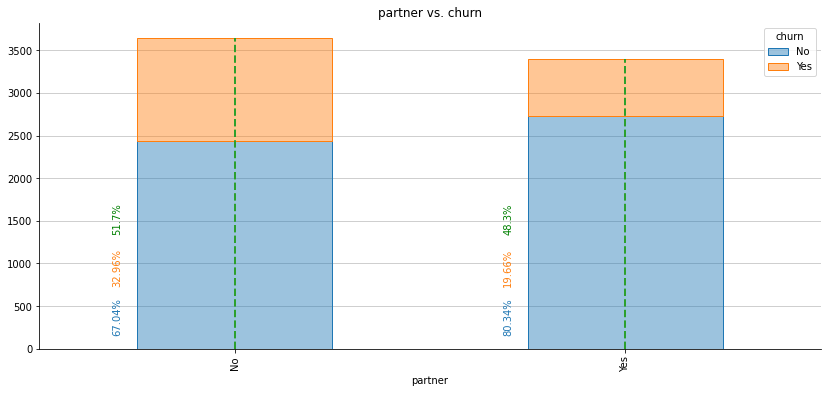

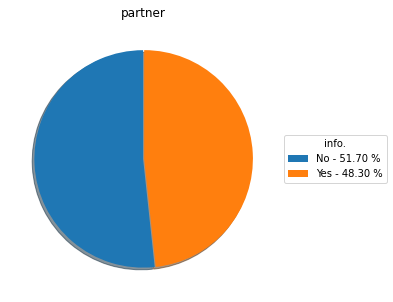

In [36]:
bar_plot(df,'partner','churn')
pie_plot(df['partner'])

## what is the probability of customers lives with dependents who canceled their subscriptions?

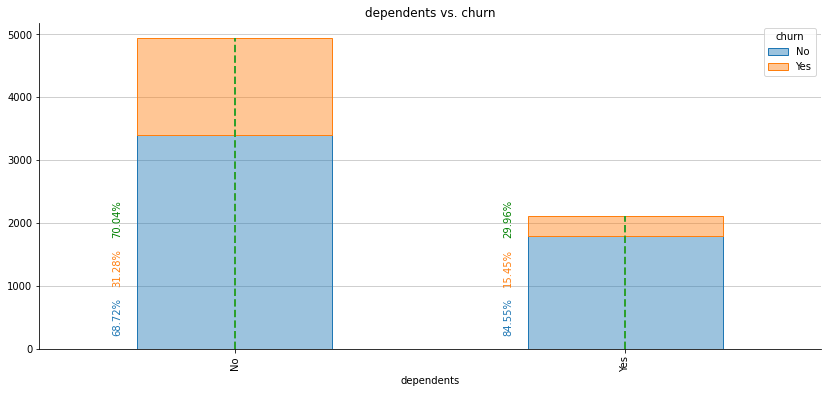

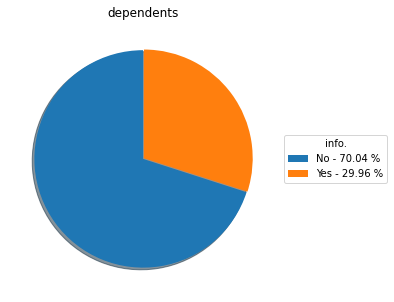

In [37]:
bar_plot(df,'dependents','churn')
pie_plot(df['dependents'])

## what is the probability of customers who canceled their subscriptions after N months count?

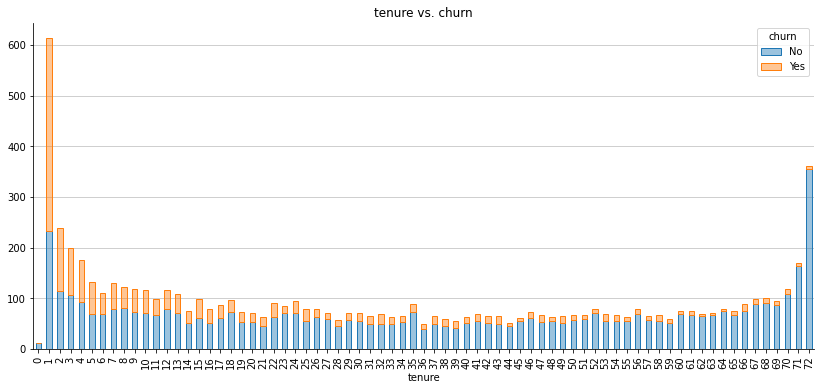

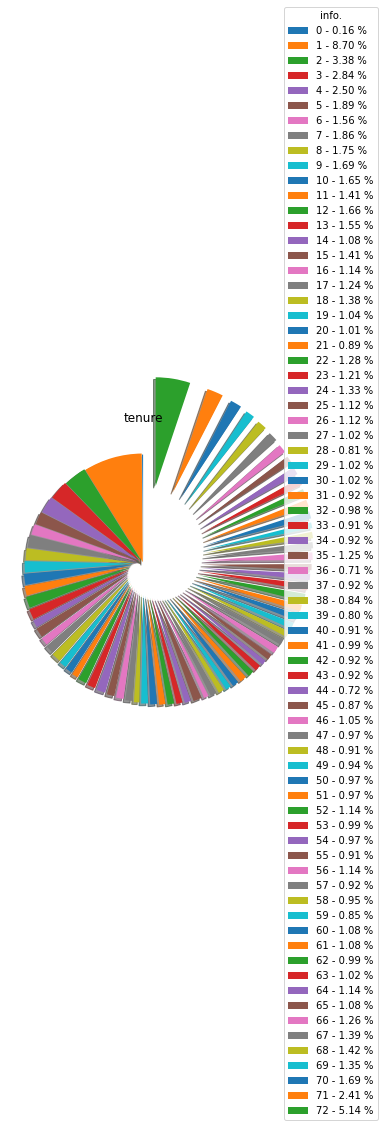

In [38]:
bar_plot(df,'tenure','churn',percentages=False)
pie_plot(df['tenure'])

## what is the probability of Phone Service subscribers who left the company?

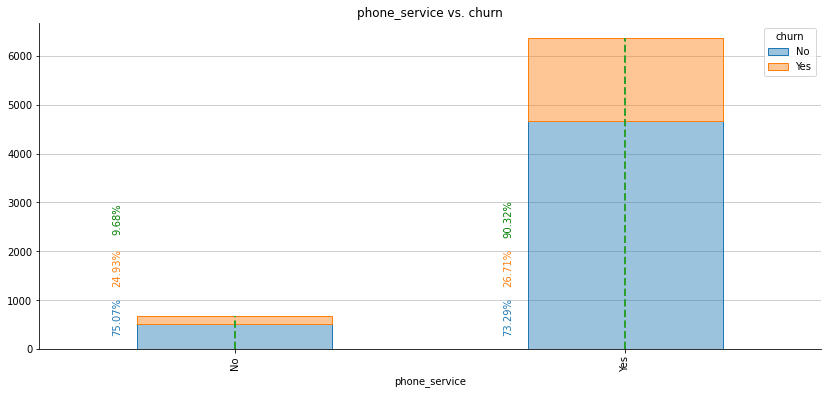

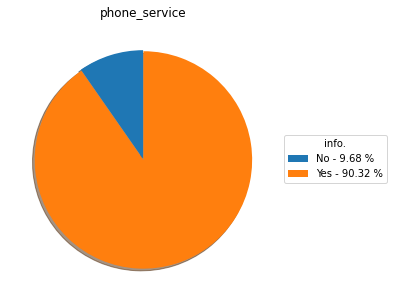

In [39]:
bar_plot(df,'phone_service','churn')
pie_plot(df['phone_service'])

## what is the probability of Multiple Telephone Lines Service subscribers who left the company?

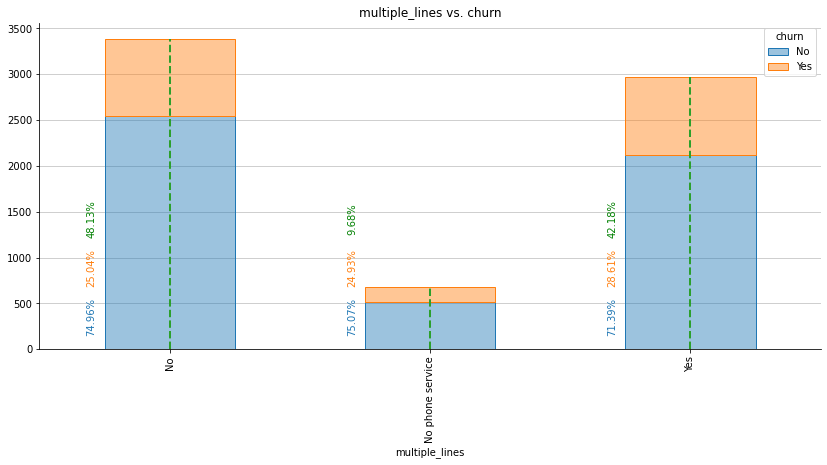

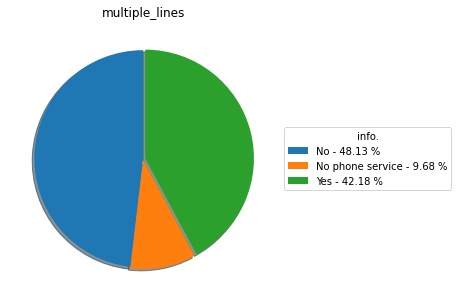

In [40]:
bar_plot(df,'multiple_lines','churn')
pie_plot(df['multiple_lines'])

## what is the probability of DSL/Fiber_Optics Internet Service subscribers who left the company?

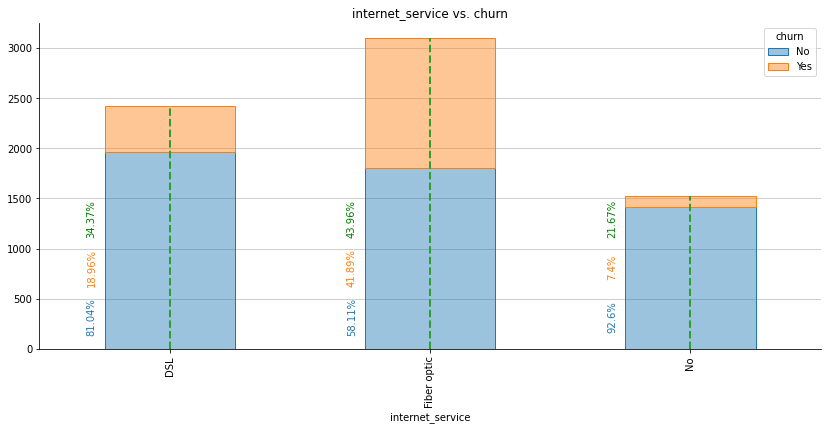

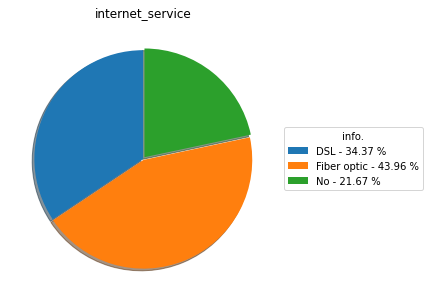

In [41]:
bar_plot(df,'internet_service','churn')
pie_plot(df['internet_service'])

## what is the probability of Online Security Service subscribers who left the company?

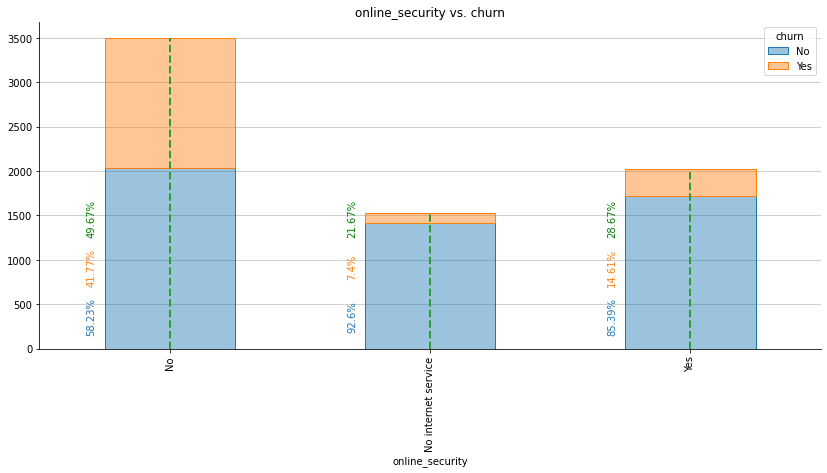

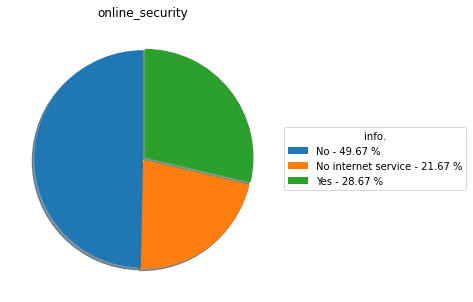

In [42]:
bar_plot(df,'online_security','churn')
pie_plot(df['online_security'])

## what is the probability of Online Backup Service subscribers who left the company?

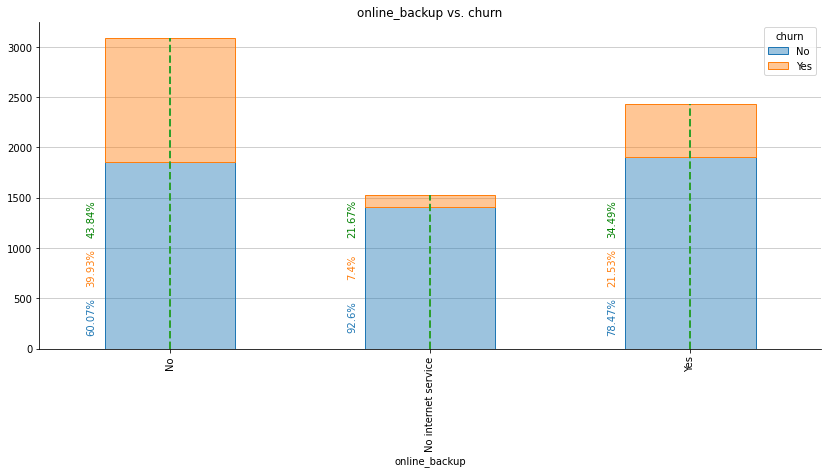

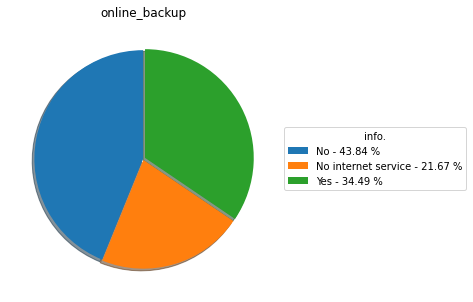

In [43]:
bar_plot(df,'online_backup','churn')
pie_plot(df['online_backup'])

## what is the probability of Device Protection Service subscribers who left the company?

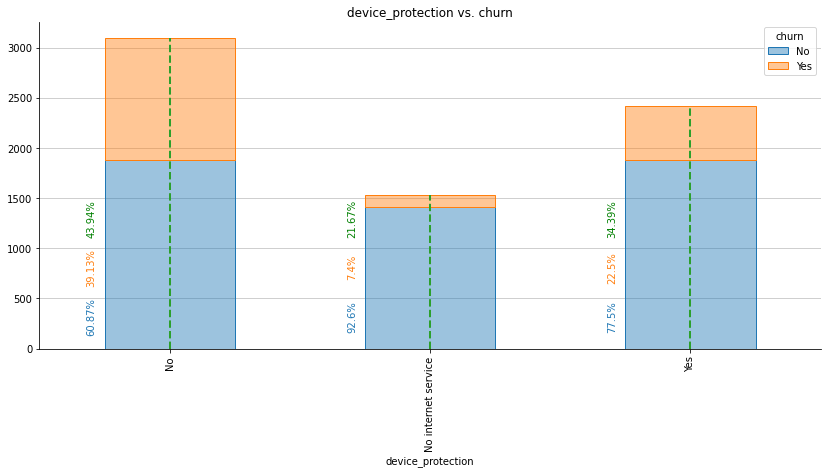

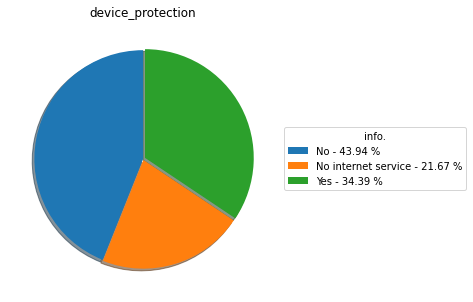

In [44]:
bar_plot(df,'device_protection','churn')
pie_plot(df['device_protection'])

## what is the probability of Reduced Wait Time Technical Support Service subscribers who left the company?

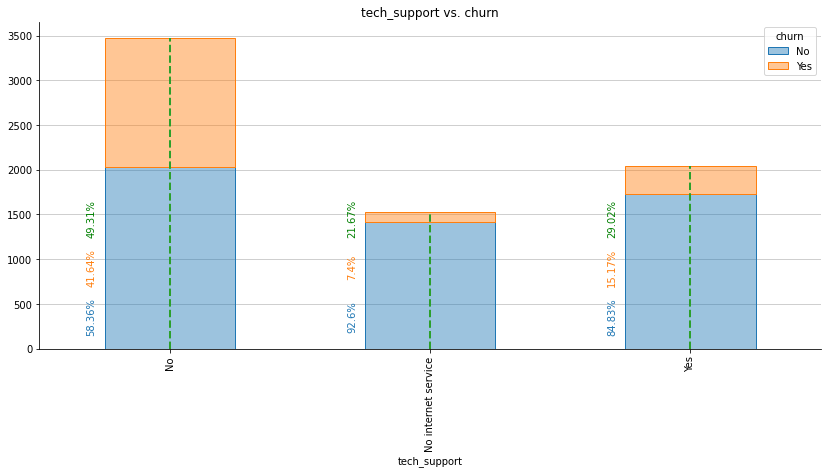

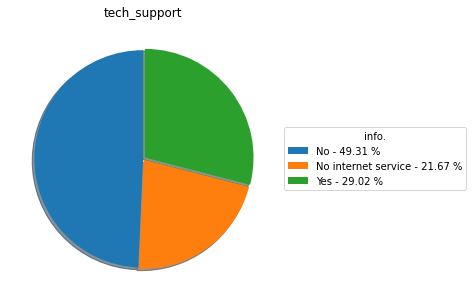

In [45]:
bar_plot(df,'tech_support','churn')
pie_plot(df['tech_support'])

## what is the probability of Streaming TV Service subscribers who left the company?

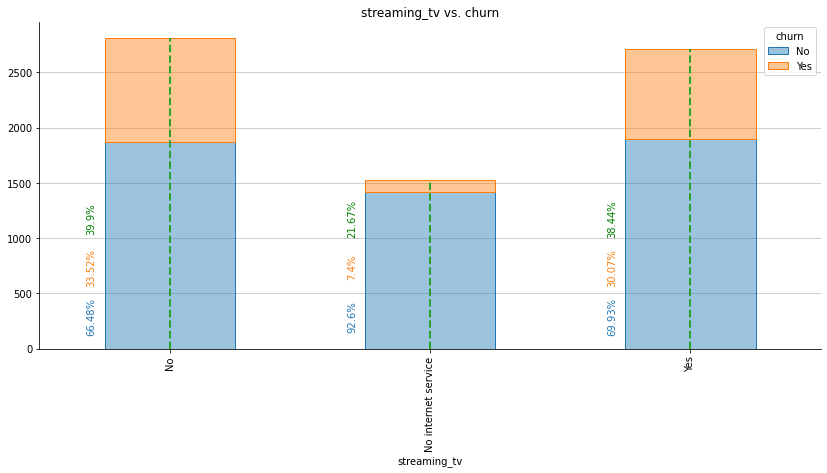

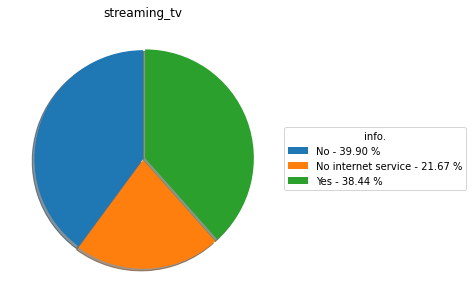

In [46]:
bar_plot(df,'streaming_tv','churn')
pie_plot(df['streaming_tv'])

## what is the probability of Streaming Movies Service subscribers who left the company?

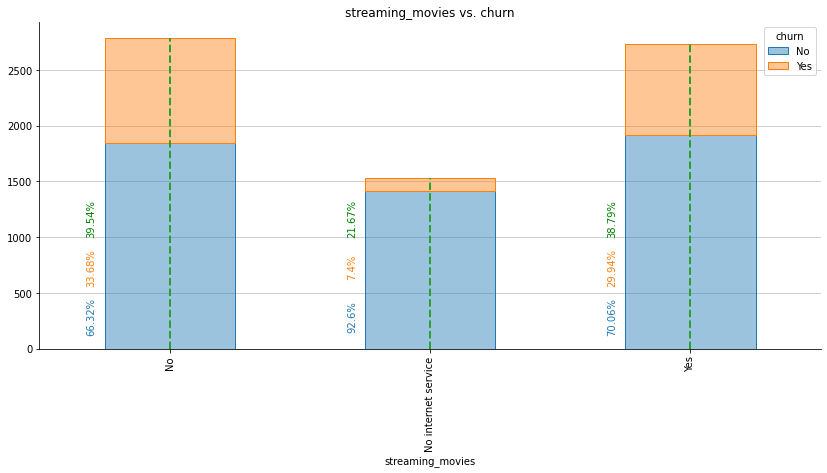

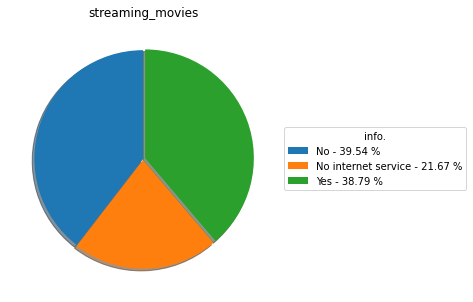

In [47]:
bar_plot(df,'streaming_movies','churn')
pie_plot(df['streaming_movies'])

## what is the probability of Month-to-Month, One Year and Two Year Contract customers who left the company?

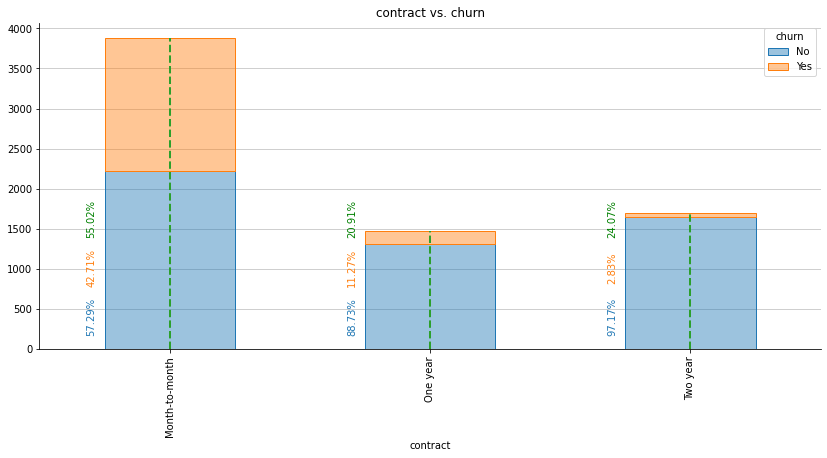

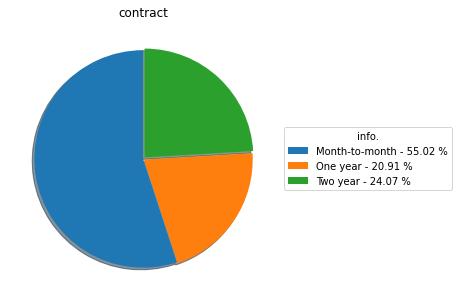

In [48]:
bar_plot(df,'contract','churn')
pie_plot(df['contract'])

## what is the probability of Paperless Billing Customers who left the company?

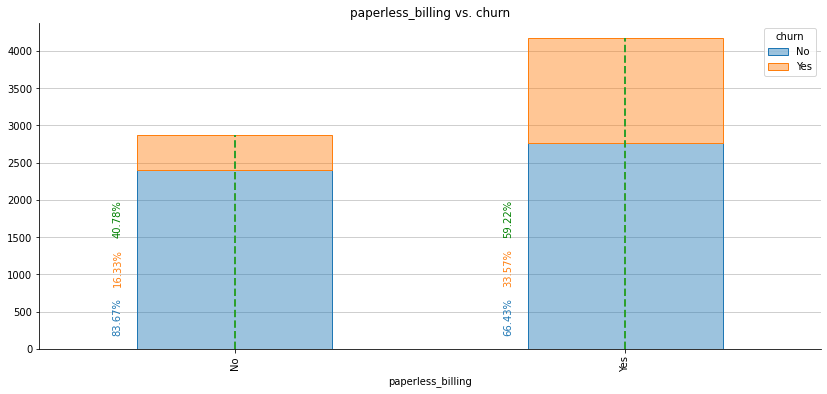

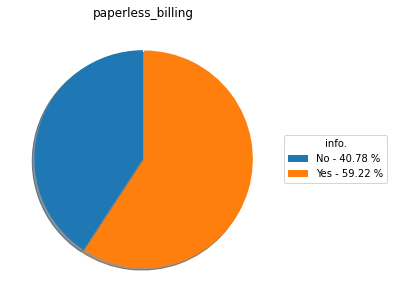

In [49]:
bar_plot(df,'paperless_billing','churn')
pie_plot(df['paperless_billing'])

## what is the probability of Bank transfer, Credit Card,Electronic check, Mailed Check payment customer who left the company?

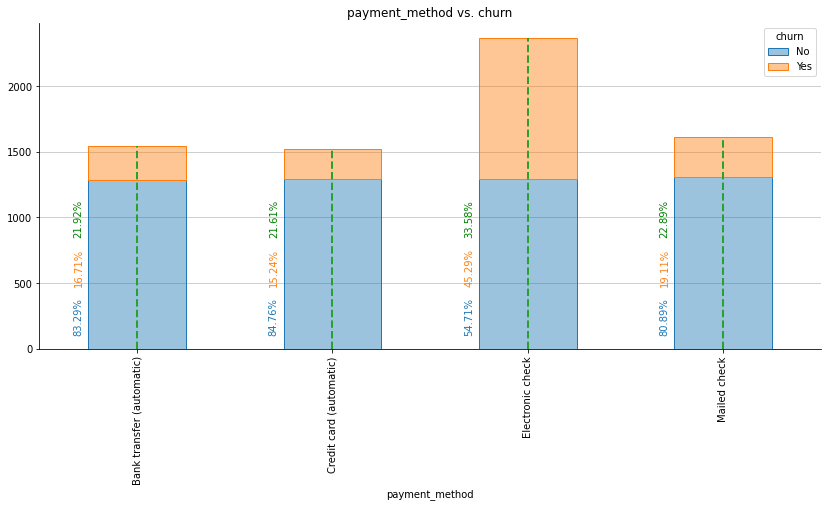

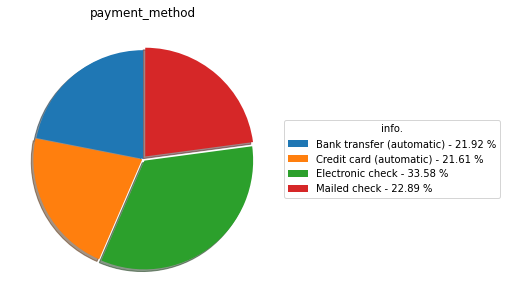

In [50]:
bar_plot(df,'payment_method','churn')
pie_plot(df['payment_method'])

## does Total Charges affect Churn rate ?

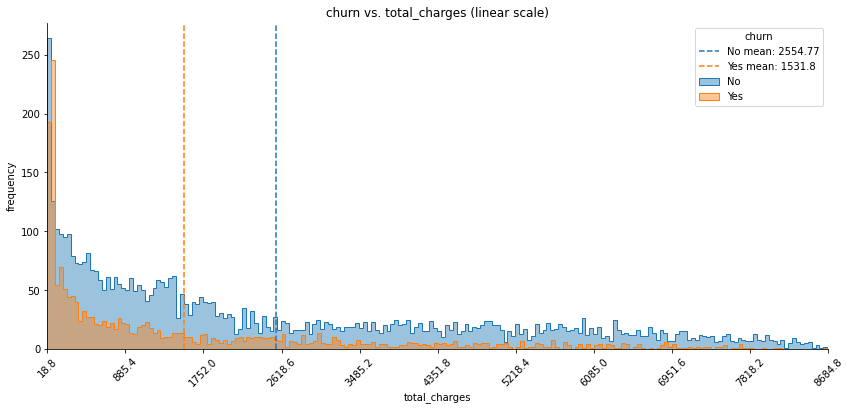

In [51]:
plt_hist(df['churn'],df['total_charges'],bins=200)

## does Monthly Charges affect Churn rate ?

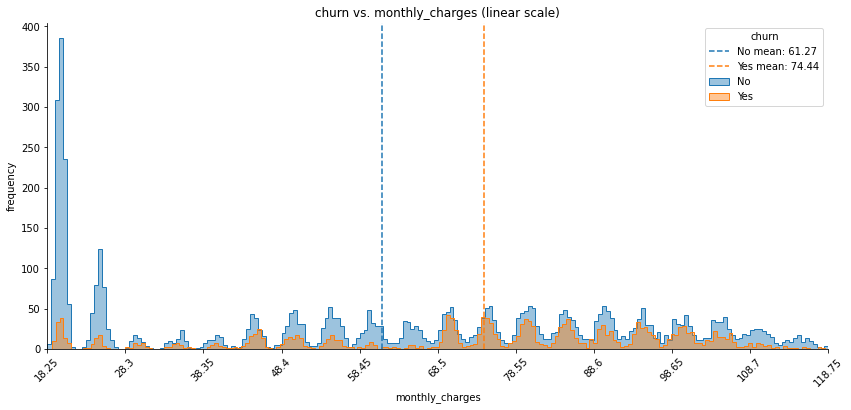

In [52]:
plt_hist(df['churn'],df['monthly_charges'],bins=200)

# A/B Test

## 1. Hypothesis test

we are going to perform hypothesis test to determine if the adding phone service reduces churn rate or not.

$$
H_0: p_{Yes} \leq p_{No}\\
H_1: p_{Yes} > p_{No}
$$

with equation rearrangement it can be

$$
H_0: p_{Yes} - p_{No} \leq 0\\
H_1: p_{Yes} - p_{No} > 0
$$

In [53]:
df['churn'] = pd.get_dummies(df['churn']).iloc[:,1]

In [54]:
p_yes = p_no = df['churn'].mean()
p_yes,p_no

(0.2653698707936959, 0.2653698707936959)

In [55]:
n_yes = (df['phone_service'] == 'Yes').sum()
n_yes

6361

In [56]:
n_no = (df['phone_service'] == 'No').sum()
n_no

682

In [57]:
yes_churn = np.random.choice([1,0], size = n_yes, p = [p_yes, (1- p_yes)]).mean()
no_churn = np.random.choice([1,0], size = n_no, p = [p_no, (1- p_no)]).mean()
p_diff = yes_churn - no_churn
p_diff

-0.01673527419885007

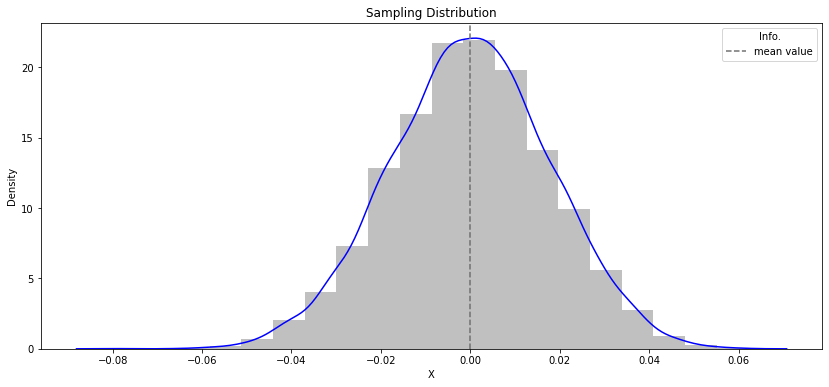

In [58]:
p_diffs = simulate_bootstrap_fast((n_no,n_yes),(p_no,p_yes))
plot_dist(p_diffs,color='#0000ff')

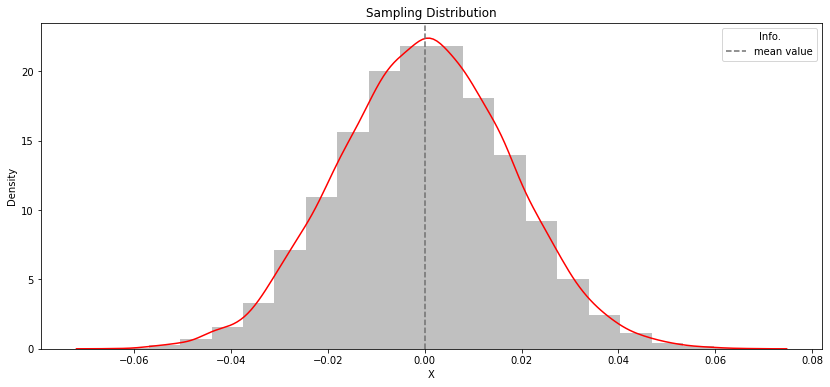

In [59]:
nullvals = np.random.normal(0,p_diffs.std(), 10000)
plot_dist(nullvals,color='#ff0000')

In [60]:
critical_val = df[df['phone_service'] == 'Yes']['churn'].mean() - df[df['phone_service'] == 'No']['churn'].mean()
p_value = (nullvals > critical_val).mean()
p_value

0.1556

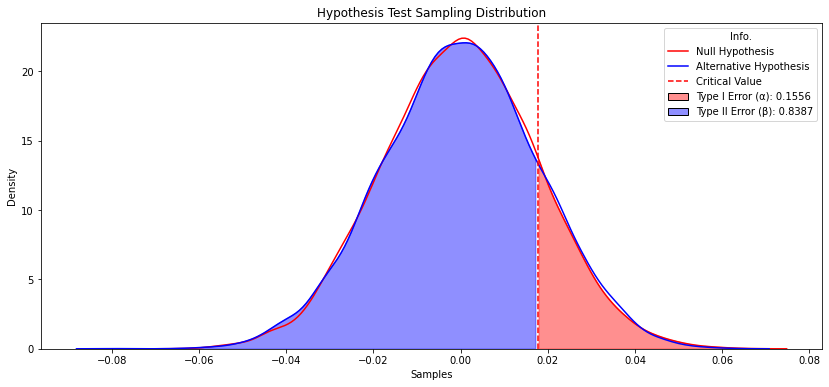

In [61]:
plot_Hypothesis(nullvals,p_diffs,critical_val)

In [62]:
churn_yes = df[df['phone_service'] == 'Yes']['churn'].sum()
churn_no = df[df['phone_service'] == 'No']['churn'].sum()
n_yes = (df['phone_service'] == 'Yes').sum()
n_no = (df['phone_service'] == 'No').sum()
z_score, p_value = sm.stats.proportions_ztest([churn_no, churn_yes], [n_no, n_yes], alternative='smaller')
print(z_score, p_value)

-1.002201814622846 0.15812306578697655


* p_value > 0.05 therefor we fail to regect the null hypothesis

## 2. Regression

* Conclusions
    1. Results
    2. Limitations